In [1]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor


## load the dataset

In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)


/Users/danfer/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1623459044803/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## iterate and visualize the dataset

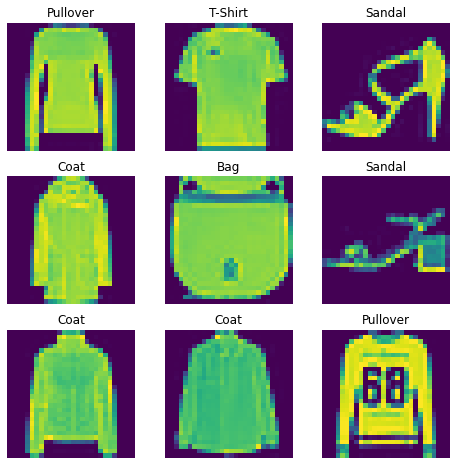

In [7]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}
figure = plt.figure(figsize=(8, 8))
col = 3
row = 3
for i in range(1, col * row +1):
    sample_idx = torch.randint(len(training_data), size=(1, )).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(row, col, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze())
plt.show()

## create a custom dataset

In [8]:
import os
import pandas as pd
from torchvision.io import read_image


In [9]:
class CustomImageDataset(Dataset):
    def __init__(self, annotation_file, img_dir, transfrom=None, targret_transfrom=None):
        self.img_labels = pd.read_csv(annotation_file)
        self.img_dir = img_dir
        self.transfrom = transfrom
        self.targret_transfrom = targret_transfrom
    
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transfrom:
            image = self.transfrom(image)
        if self.targret_transfrom:
            label = self.targret_transfrom(label)
        return image, label

## prepare data for training with dataloader

In [10]:
from torch.utils.data import DataLoader

In [128]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## iterate through the dataloader

feature batch shape: torch.Size([64, 1, 28, 28])
label batch shape: torch.Size([64])
tensor(7)


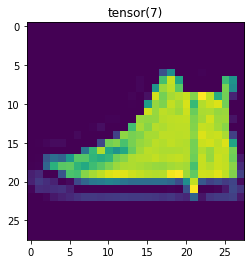

In [199]:
train_features, train_labels = next(iter(train_dataloader))
print(f"feature batch shape: {train_features.size()}")
print(f"label batch shape: {train_labels.size()}")

img = train_features[50].squeeze()
label = train_labels[50]
print(label)
plt.title(label)
plt.imshow(img)
plt.show()
